In [120]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

In [64]:
data=pd.read_csv("segmentation data.csv")
data.head(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [66]:
data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [67]:
col =['Sex','Marital status','Education','Occupation','Settlement size']
data[col]=data[col].astype('str')

In [68]:
data.sample(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
514,100000515,0,0,54,1,124725,1,0
1549,100001550,1,1,29,1,111992,1,0
441,100000442,1,1,30,1,106577,1,1
723,100000724,1,1,66,3,133328,0,0
238,100000239,1,1,35,1,107408,1,1


In [69]:
data.describe(include='object').T

,count,unique,top,freq
Sex,2000,2,0,1086
Marital status,2000,2,0,1007
Education,2000,4,1,1386
Occupation,2000,3,1,1113
Settlement size,2000,3,0,989


In [121]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,1.000000e+08,1.000005e+08,1.000010e+08,1.000015e+08,1.000020e+08
Age,2000.0,3.590900e+01,11.719402,1.800000e+01,2.700000e+01,3.300000e+01,4.200000e+01,7.600000e+01
Income,2000.0,1.209544e+05,38108.824679,3.583200e+04,9.766325e+04,1.155485e+05,1.380722e+05,3.093640e+05
transf_income,2000.0,-6.374901e-16,1.000250,-3.656563e+00,-5.554080e-01,-9.578160e-03,5.768133e-01,3.344397e+00
transf_age,2000.0,3.532594e+00,0.305600,2.890372e+00,3.295837e+00,3.496508e+00,3.737670e+00,4.330733e+00


In [117]:
numcol = ['ID','Age','Income']
catcol = ['Sex','Marital status','Education','Occupation','Settlement size']

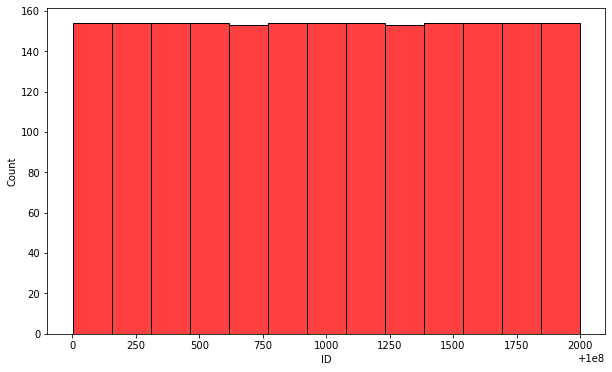

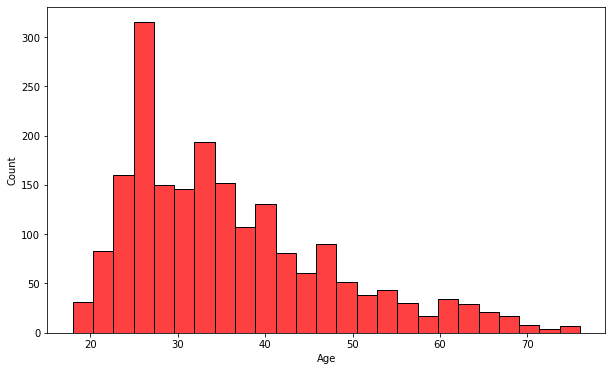

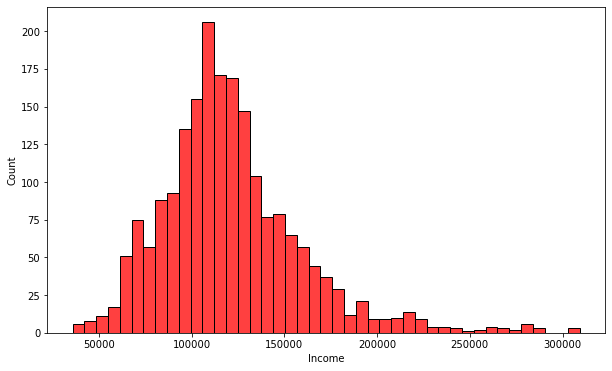

In [118]:
for numerical in numcol:
    plt.figure(figsize=(10,6))
    sns.histplot(data=data, x=numerical,color="red")


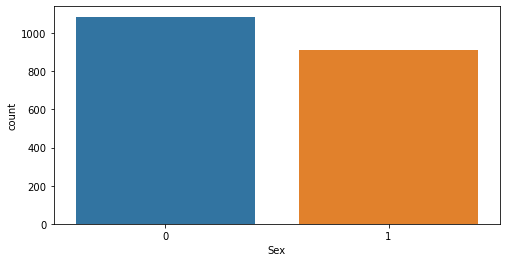

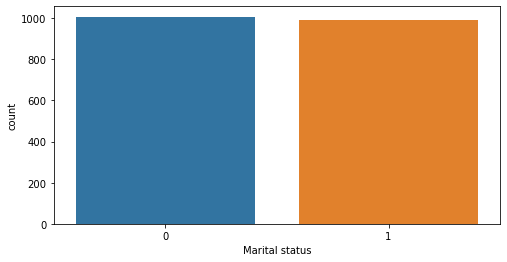

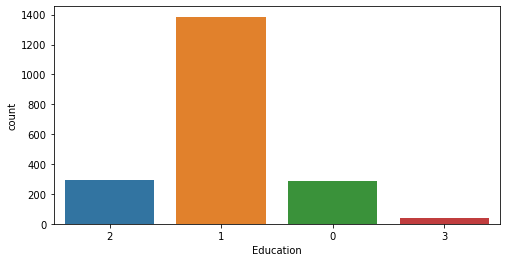

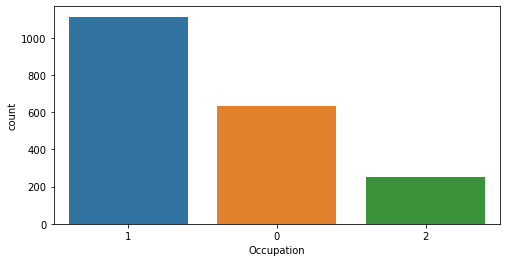

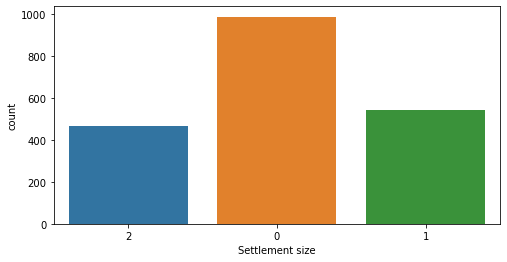

In [101]:
for category in catcol:
    plt.figure(figsize=(8,4))
    sns.countplot(data=data, x=category)

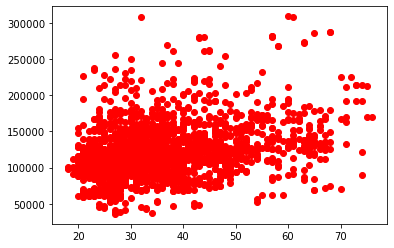

In [102]:
plt.scatter(x="Age",y="Income",data=data,color='red');

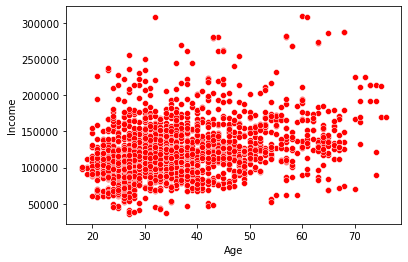

In [103]:
sns.scatterplot(x="Age",y='Income',data=data,color='red');

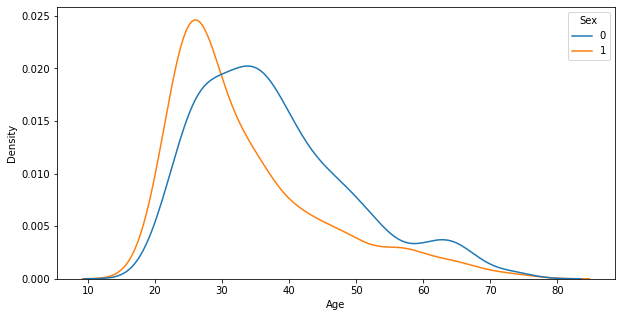

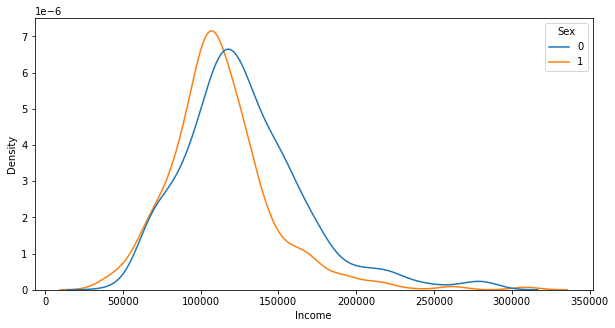

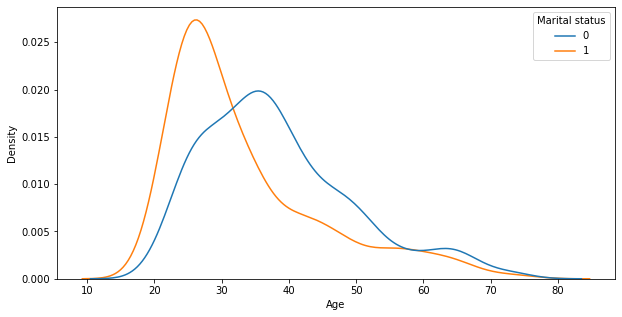

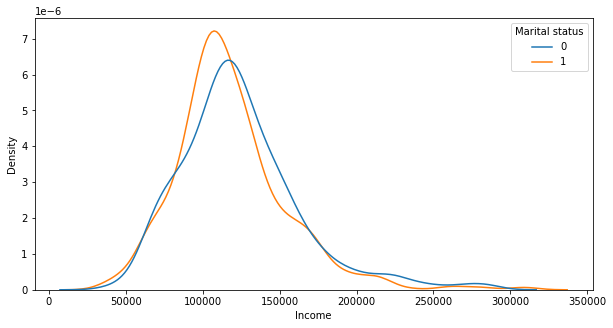

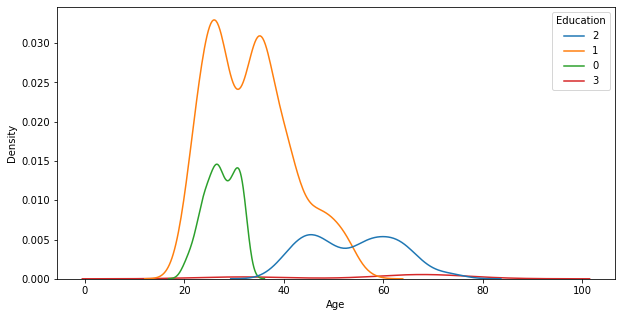

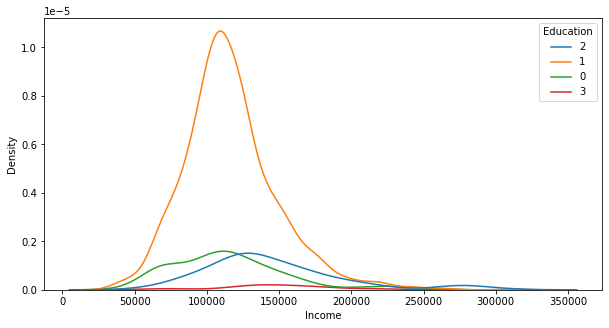

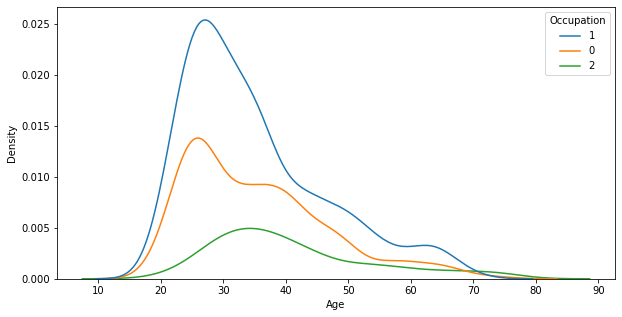

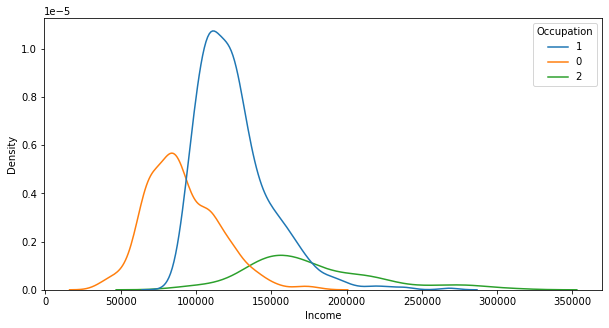

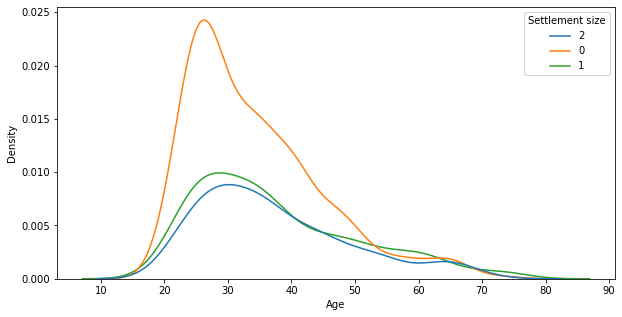

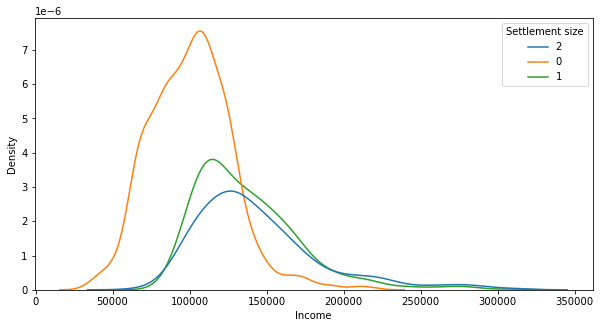

In [104]:
for category in catcol:
    for numerical in numcol:
        if numerical != 'ID':
            plt.figure(figsize=(10,5))
            sns.kdeplot(data=data, x=numerical, hue=category)

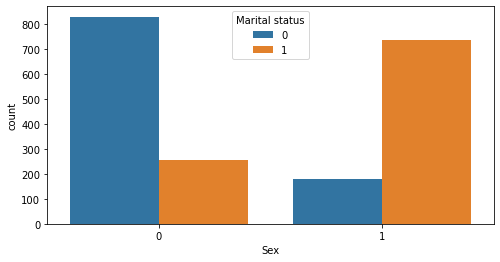

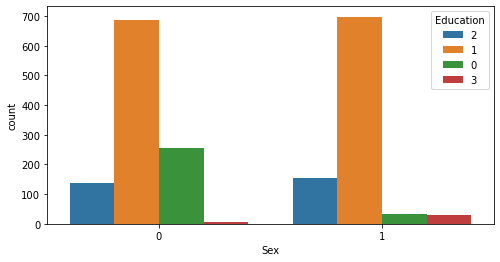

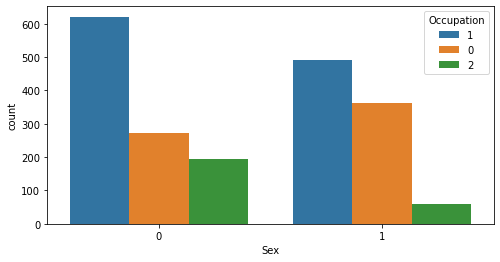

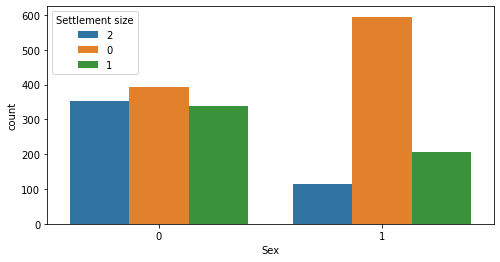

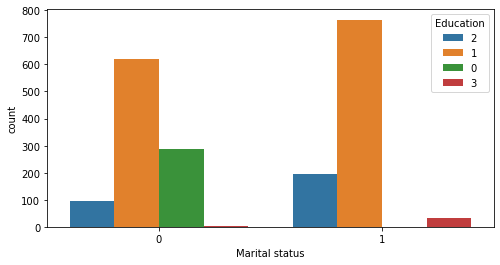

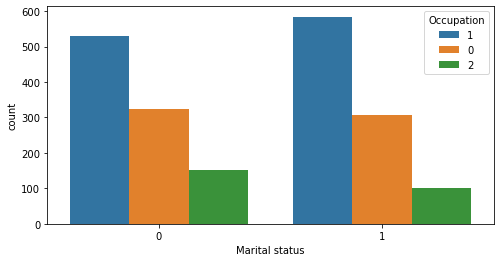

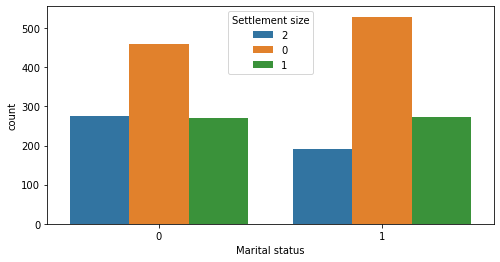

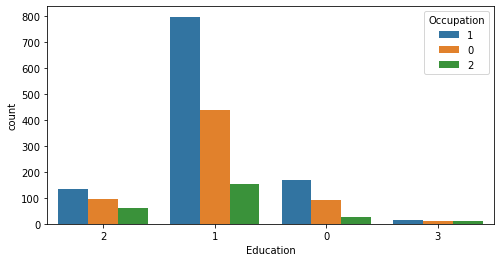

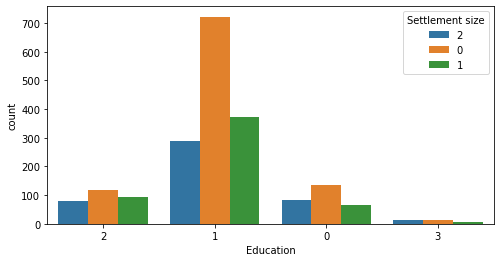

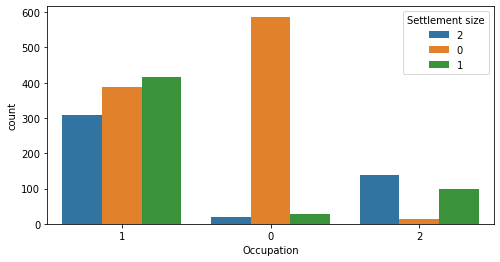

In [105]:
cat_aux = catcol.copy()
for category1 in catcol:
    cat_aux.pop(0);
    for category2 in cat_aux:
        if category1 != category2:
            plt.figure(figsize=(8,4))
            sns.countplot(data=data, x=category1, hue=category2)

In [106]:
def b_scatter(x,y,hue,df):
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=x,y=y,data=df,hue=hue,alpha=0.7)

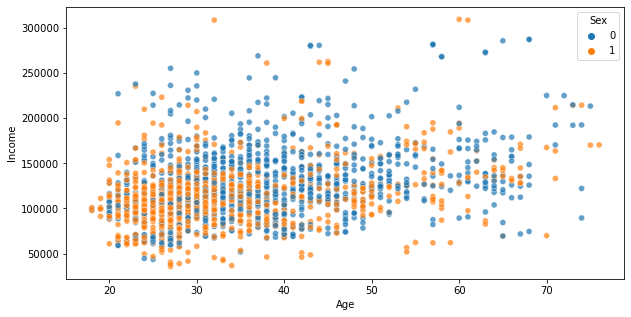

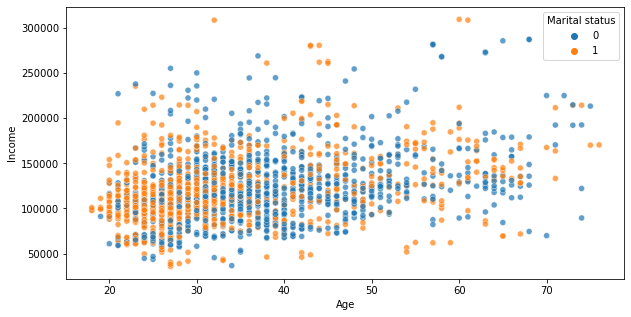

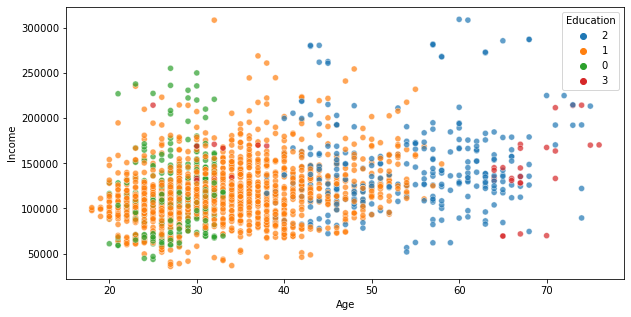

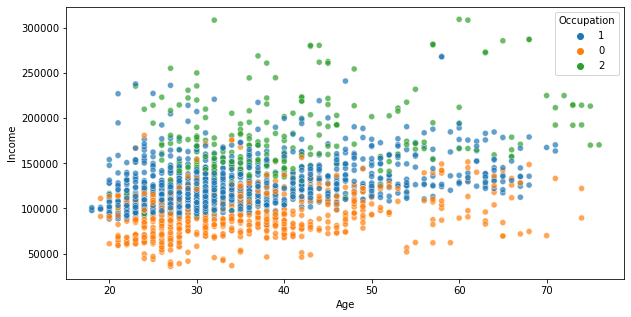

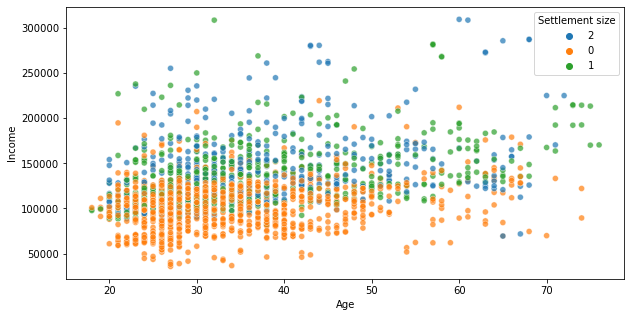

In [107]:
for word in catcol:
    b_scatter('Age','Income',word,data)

In [108]:
def apply_log(column):
    return np.log(column)

def normality_test(column):
    return stats.normaltest(column)

In [109]:
feature = data['Income'].to_numpy().reshape(-1,1)
powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature)
array_1d = feature_transf.flatten()
feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))
log_transformed_income = apply_log(data['Income'])

In [87]:
feature2 = data['Age'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature2)
array_1d = feature_transf.flatten()
feature2 = pd.Series(data=array_1d, index=list(range(len(array_1d))))

log_transformed_age = apply_log(data['Age'])

In [88]:
data['transf_income'] = feature
data['transf_age']    = log_transformed_age

In [93]:
cust_transf = data.drop(['Income', 'Age', 'ID'], axis=1)
cust_transf.sample(5)

,Sex,Marital status,Education,Occupation,Settlement size,transf_income,transf_age
83,1,1,2,0,0,-0.472345,4.060443
183,0,0,1,1,2,1.402437,3.912023
150,0,0,1,1,0,0.112146,3.737670
1312,1,0,1,0,0,-1.017184,3.258097
967,1,1,2,2,2,1.359622,3.988984


In [97]:
scaler = MinMaxScaler()
X = scaler.fit_transform(cust_transf)
X.shape

(2000, 7)

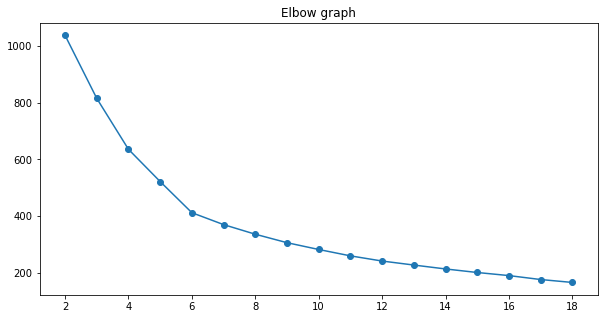

In [113]:
#Kmeans
clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('Elbow graph')
plt.plot(clusters_range,inertias, marker='o');

In [124]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(10)

,P1,P2
0,0.829143,0.350518
1,-0.531854,0.719504
2,0.489493,-0.693627
3,0.712487,-0.027906
4,0.718334,-0.036815
5,0.483132,-0.659081
6,0.719851,-0.032467
7,0.775114,0.231674
8,-0.156933,-0.173657
9,-0.019959,0.288473


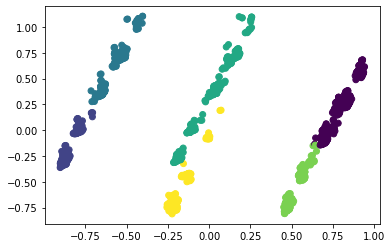

In [127]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_principal)
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = KMeans(n_clusters = 6).fit_predict(X)) 
plt.show() 